IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

LOAD DATASET

In [2]:
df = pd.read_csv('/content/anemia.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


<Axes: xlabel='Result', ylabel='count'>

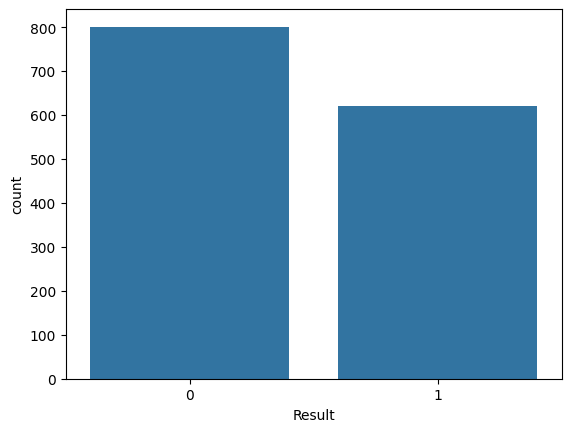

In [3]:
df.info()
df['Result'].value_counts()
sns.countplot(x='Result', data=df)

PRE-PROCESSING

In [4]:
#Cek Null
print(df.isnull().sum())

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


In [5]:
# Lihat distribusi label Result
df['Result'].value_counts()

,count
Result,
0,801
1,620


In [6]:
# Pisahkan fitur dan target
X = df.drop(columns=['Result'])
y = df['Result']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL

In [8]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


In [9]:
from xgboost import XGBClassifier

# Latih pakai data tanpa scaling
xgb_model = XGBClassifier(random_state=42, verbosity=1, n_estimators=100)
xgb_model.fit(X_train, y_train)  # X_train, bukan X_train_scaled
y_pred_xgb = xgb_model.predict(X_test)


EVALUASI

In [10]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Logistic Regression
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))
print("LogReg Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("LogReg F1 Score:", f1_score(y_test, y_pred_logreg))

# Random Forest
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF F1 Score:", f1_score(y_test, y_pred_rf))

# XGBoost
print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.98      1.00      0.99       124

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285

LogReg Accuracy: 0.9894736842105263
LogReg F1 Score: 0.9880478087649402

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       124

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285

RF Accuracy: 1.0
RF F1 Score: 1.0

=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       124

    accu

In [11]:
from sklearn.metrics import accuracy_score, f1_score

print("LogReg Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("LogReg F1 Score:", f1_score(y_test, y_pred_logreg))

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF F1 Score:", f1_score(y_test, y_pred_rf))

LogReg Accuracy: 0.9894736842105263
LogReg F1 Score: 0.9880478087649402
RF Accuracy: 1.0
RF F1 Score: 1.0


In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Evaluasi ulang untuk Logistic Regression
results = {
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_logreg)],
    'Precision': [precision_score(y_test, y_pred_logreg)],
    'Recall': [recall_score(y_test, y_pred_logreg)],
    'F1-Score': [f1_score(y_test, y_pred_logreg)]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression  0.989474   0.976378     1.0  0.988048


TAMBAH FITUR

In [13]:
# Buat fitur baru Hb/MCV ratio
df['Hb_MCV_ratio'] = df['Hemoglobin'] / df['MCV']

# Cek ringkasan statistik rasio ini
print(df['Hb_MCV_ratio'].describe())

count    1421.000000
mean        0.158925
std         0.030023
min         0.072939
25%         0.136653
50%         0.158028
75%         0.177691
max         0.237288
Name: Hb_MCV_ratio, dtype: float64


In [14]:
# Pisahkan fitur dan target baru
X = df.drop(columns=['Result'])  # pastikan termasuk fitur baru
y = df['Result']

# Split ulang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling ulang
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

training ulang model

In [15]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluasi ulang
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       161
           1       0.98      1.00      0.99       124

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Evaluasi XGBoost
xgb_results = {
    'Model': ['XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_xgb)],
    'F1-Score': [f1_score(y_test, y_pred_xgb)]
}

xgb_results_df = pd.DataFrame(xgb_results)
print("=== Evaluasi Singkat XGBoost ===")
print(xgb_results_df)

print("\n=== Classification Report XGBoost ===")
print(classification_report(y_test, y_pred_xgb, target_names=["Normal", "Anemia"]))

=== Evaluasi Singkat XGBoost ===
     Model  Accuracy  Precision  Recall  F1-Score
0  XGBoost       1.0        1.0     1.0       1.0

=== Classification Report XGBoost ===
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       161
      Anemia       1.00      1.00      1.00       124

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [17]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Inisialisasi model
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Inisialisasi Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi dengan cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(xgb_model, X, y, cv=skf, scoring=scoring)

# Menampilkan rata-rata hasil
for metric in scoring:
    print(f"{metric.capitalize()} (mean): {np.mean(cv_results[f'test_{metric}']):.4f}")

Accuracy (mean): 1.0000
Precision (mean): 1.0000
Recall (mean): 1.0000
F1 (mean): 1.0000


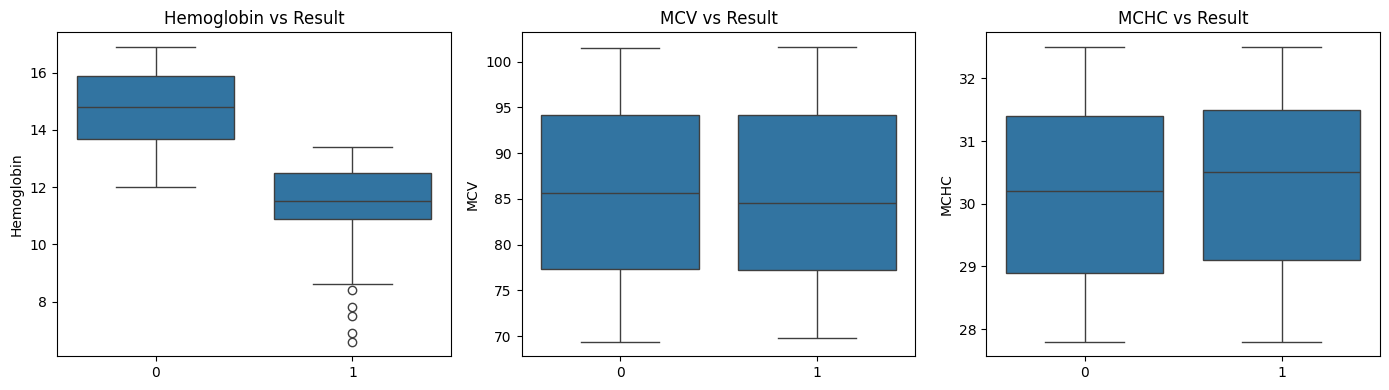

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["Hemoglobin", "MCV", "MCHC"]

plt.figure(figsize=(14,4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(x="Result", y=feature, data=df)
    plt.title(f"{feature} vs Result")
    plt.xlabel("")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [19]:
print(df.columns)


Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result', 'Hb_MCV_ratio'], dtype='object')


In [20]:
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv("anemia.csv")

# Pisahkan fitur dan label
X = df.drop("Result", axis=1)   # ganti "Result" dengan nama kolom label di datasetmu
y = df["Result"]

# Jika ada fitur kategori (misal Gender), encode
if X["Gender"].dtype == "object":
    le = LabelEncoder()
    X["Gender"] = le.fit_transform(X["Gender"])

# ===============================
# 2. Buat pipeline (scaler + model)
# ===============================
model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ))
])

# ===============================
# 3. K-Fold Cross Validation
# ===============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision", "recall", "f1"]

results = cross_validate(
    model,
    X, y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# ===============================
# 4. Cetak Hasil
# ===============================
print("Accuracy (mean):", np.mean(results["test_accuracy"]))
print("Precision (mean):", np.mean(results["test_precision"]))
print("Recall (mean):", np.mean(results["test_recall"]))
print("F1 (mean):", np.mean(results["test_f1"]))

Accuracy (mean): 1.0
Precision (mean): 1.0
Recall (mean): 1.0
F1 (mean): 1.0


Visualisasi K-Cross

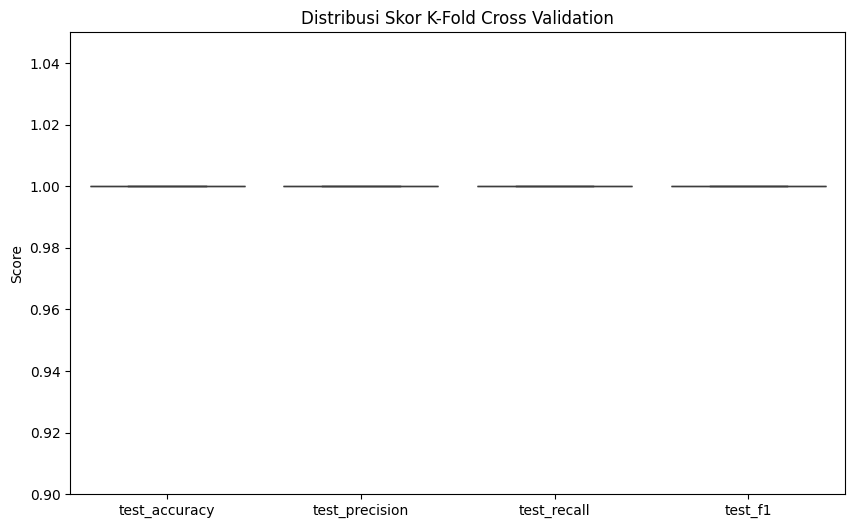

test_accuracy     1.0
test_precision    1.0
test_recall       1.0
test_f1           1.0
dtype: float64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan label
X = df.drop(columns=["Result"])
y = df["Result"]

# StratifiedKFold supaya proporsi kelas seimbang di tiap fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model contoh (Random Forest)
model = RandomForestClassifier(random_state=42)

# Cross-validation untuk accuracy, precision, recall, f1
from sklearn.model_selection import cross_validate

scoring = ["accuracy", "precision", "recall", "f1"]
cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

# Ubah hasil ke DataFrame biar rapi
cv_df = pd.DataFrame(cv_results)

# Plot hasil tiap metric
plt.figure(figsize=(10,6))
sns.boxplot(data=cv_df[["test_accuracy", "test_precision", "test_recall", "test_f1"]])
plt.title("Distribusi Skor K-Fold Cross Validation")
plt.ylabel("Score")
plt.ylim(0.9, 1.05)  # biar lebih fokus
plt.show()

# Print mean tiap metric
print(cv_df[["test_accuracy", "test_precision", "test_recall", "test_f1"]].mean())

IMPLEMENTASI SHAP

In [22]:
!pip install shap
import shap

INTERPRETASI SHAP

In [23]:
# Buat DataFrame dari X_test_scaled untuk keperluan SHAP
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

ValueError: Shape of passed values is (285, 6), indices imply (285, 5)

Fitur disusun berdasarkan kontribusinya

Warna merah ke biru menunjukkan nilai fitur tinggi ke rendah

Sumbu X menunjukkan besarnya pengaruh fitur terhadap output model

In [ ]:
# Inisialisasi SHAP
explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_df)

In [ ]:
print(type(shap_values))
print(np.array(shap_values).shape)

CONFUSION  MATRIX

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anemia"], yticklabels=["Normal", "Anemia"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('conf_matrix_logreg.png', dpi=300)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix untuk XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal", "Anemia"],
            yticklabels=["Normal", "Anemia"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('conf_matrix_xgb.png', dpi=300)
plt.show()

In [ ]:
# Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Normal", "Anemia"],
            yticklabels=["Normal", "Anemia"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('conf_matrix_rf.png', dpi=300)
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Training XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

print("=== XGBoost ===")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

In [ ]:
results = {
    'Model': ['LogReg', 'RandomForest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)